In [72]:
import gensim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.preprocessing

In [2]:
w = gensim.models.KeyedVectors.load_word2vec_format(
    'GoogleNews-vectors-negative300.bin', binary=True)

In [19]:
w.vector_size, w.key_to_index['mother'], w.key_to_index['father']

(300, 852, 913)

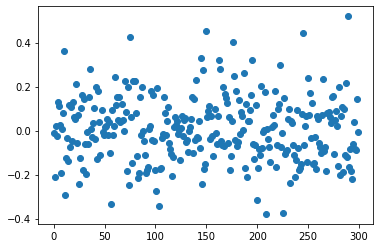

In [20]:
plt.scatter(range(w.vector_size),w['mother'])

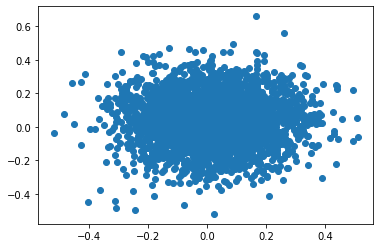

In [52]:
x = []
y = []
for i in range(3000):
    x.append(w[i][0])
    y.append(w[i][1])
plt.scatter(x,y)

In [45]:
w.most_similar(w['father'])

[('son', 0.8933085799217224),
 ('uncle', 0.8542662858963013),
 ('brother', 0.8240807056427002),
 ('grandfather', 0.8048632740974426),
 ('dad', 0.8040656447410583),
 ('mother', 0.7901482582092285),
 ('nephew', 0.7880791425704956),
 ('stepfather', 0.7810977697372437),
 ('eldest_son', 0.7770525813102722),
 ('grandson', 0.7620671987533569)]

In [49]:
w.similar_by_vector(w['father']-w['woman']+w['man'])

[('father', 0.8191315531730652),
 ('uncle', 0.7533612251281738),
 ('brother', 0.7488052845001221),
 ('younger_brother', 0.7446495890617371),
 ('son', 0.725501537322998),
 ('dad', 0.7059285640716553),
 ('grandfather', 0.6951889395713806),
 ('nephew', 0.6911855936050415),
 ('eldest_son', 0.6681656837463379),
 ('elder_brother', 0.6611368656158447)]

In [57]:
poker = pd.read_csv('pmlb/poker/poker.tsv.gz',sep='\t')

In [58]:
poker.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,target
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0


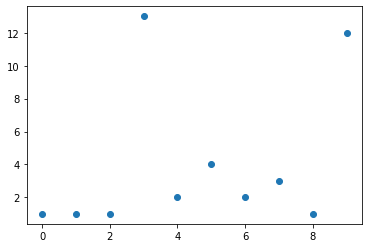

In [66]:
plt.scatter(range(10),poker.iloc[0].values[0:10])

In [68]:
adult = pd.read_csv('pmlb/adult/adult.tsv.gz', sep='\t')
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39.0,7,77516.0,9,13.0,4,1,1,4,1,2174.0,0.0,40.0,39,1
1,50.0,6,83311.0,9,13.0,2,4,0,4,1,0.0,0.0,13.0,39,1
2,38.0,4,215646.0,11,9.0,0,6,1,4,1,0.0,0.0,40.0,39,1
3,53.0,4,234721.0,1,7.0,2,6,0,2,1,0.0,0.0,40.0,39,1
4,28.0,4,338409.0,9,13.0,2,10,5,2,0,0.0,0.0,40.0,5,1


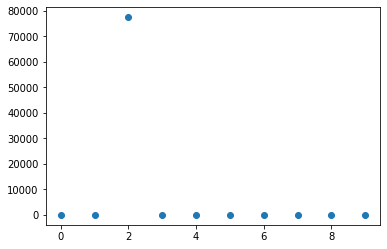

In [69]:
plt.scatter(range(10),adult.iloc[0].values[0:10])

In [87]:
adult_2 = sklearn.preprocessing.RobustScaler().fit_transform(adult.values[:,:-1])
adult_norm = pd.DataFrame(data=np.hstack([adult_2, np.array([adult.target]).T]), columns=adult.columns)
adult_norm.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,0.10,3.0,-0.837932,-0.666667,1.000000,1.0,-0.857143,0.000000,0.0,0.0,2174.0,0.0,0.0,0.0,1.0
1,0.65,2.0,-0.789677,-0.666667,1.000000,0.0,-0.428571,-0.333333,0.0,0.0,0.0,0.0,-5.4,0.0,1.0
2,0.05,0.0,0.312274,0.000000,-0.333333,-1.0,-0.142857,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.80,0.0,0.471112,-3.333333,-1.000000,0.0,-0.142857,-0.333333,-2.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.45,0.0,1.334520,-0.666667,1.000000,0.0,0.428571,1.333333,-2.0,-1.0,0.0,0.0,0.0,-34.0,1.0


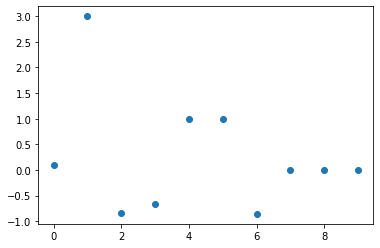

In [88]:
plt.scatter(range(10),adult_norm.iloc[0].values[0:10])